In [ ]:
import math
import numpy as np
from numba import cuda, jit
from datetime import datetime

CPU_tmp = 0 
GPU_tmp = 0 
CPU_time = []
CPU_matsize = []
GPU_time = []
GPU_matsize = []

def info(TBS): 
  A = np.random.uniform (-100, 100, TBS*TBS*TBS*TBS)
  A = A.reshape(TBS*TBS, TBS*TBS)
  B = np.random.uniform (-100, 100, TBS*TBS*TBS*TBS)
  B = B.reshape(TBS*TBS, TBS*TBS)
  C = np.zeros((TBS*TBS,TBS*TBS ))


  def MatMul(A, B, C):
    for i in range(C.shape[0]):
      for j in range(C.shape[1]):
        sum = 0
        for k in range (A.shape[1]):
          sum += A[i,k] * B[k, j]
          C[i,j] = sum
    
  start = datetime.now()
  MatMul(A, B, C)
  CPU_res = C
  print("CPU MatMul's time: ", datetime.now()-start)
  CPU_tmp=(datetime.now()-start) 
  CPU_time.append(CPU_tmp.total_seconds()) 
  CPU_matsize.append(TBS*TBS*TBS*TBS)

  @cuda.jit 
  def MatMul_cuda(A, B, C):
    i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
    j = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y
    if i < C.shape[0] and j < C.shape[1]:
      sum = 0
      for k in range(A.shape[1]):
        sum += A[i, k] * B[k, j]
        C[i, j] = sum

      
  def host_naive(A,B,C): 
    d_A = cuda.to_device(A) 
    d_B = cuda.to_device(B)
    d_C = cuda.device_array(C.shape, np.float64)

    block = (TBS, TBS)
    blockgrid_x = math.ceil(A.shape[0]/ block[0])
    blockgrid_y = math.ceil(B.shape[1]/ block[1])
    blockgrid = (blockgrid_x, blockgrid_y)
    

    MatMul_cuda[blockgrid, block](d_A, d_B, d_C)
 
    return d_C.copy_to_host()

  start = datetime.now()
  host_naive(A,B,C)
  GPU_res = C
  print("GPU MatMul's time: ", datetime.now() - start)
  GPU_tmp=(datetime.now()-start)
  GPU_time.append(GPU_tmp.total_seconds())
  GPU_matsize.append(TBS*TBS*TBS*TBS)

  ch = True
  res = CPU_res - GPU_res
  for row in res:
    for el in row:
      if el != 0:
        ch = False
        break
  if ch:
    print('Matricies are equal')
  else:
    print ('error')

TBS = 1
while TBS <=32:
  print()
  print("TBS", TBS)
  info(TBS)
  TBS +=1
print ("Max size for TPB is 32!")


TBS 1
CPU MatMul's time:  0:00:00.000029
GPU MatMul's time:  0:00:00.231708
Matricies are equal

TBS 2
CPU MatMul's time:  0:00:00.000096
GPU MatMul's time:  0:00:00.245179
Matricies are equal

TBS 3
CPU MatMul's time:  0:00:00.000657
GPU MatMul's time:  0:00:00.252203
Matricies are equal

TBS 4
CPU MatMul's time:  0:00:00.003496
GPU MatMul's time:  0:00:00.327999
Matricies are equal

TBS 5
CPU MatMul's time:  0:00:00.018443
GPU MatMul's time:  0:00:00.236313
Matricies are equal

TBS 6
CPU MatMul's time:  0:00:00.041503
GPU MatMul's time:  0:00:00.243579
Matricies are equal

TBS 7
CPU MatMul's time:  0:00:00.095345
GPU MatMul's time:  0:00:00.249063
Matricies are equal

TBS 8
CPU MatMul's time:  0:00:00.212421
GPU MatMul's time:  0:00:00.238863
Matricies are equal

TBS 9
CPU MatMul's time:  0:00:00.426479
GPU MatMul's time:  0:00:00.245657
Matricies are equal

TBS 10
CPU MatMul's time:  0:00:00.799955
GPU MatMul's time:  0:00:00.249563
Matricies are equal

TBS 11
CPU MatMul's time:  0

KeyboardInterrupt: ignored

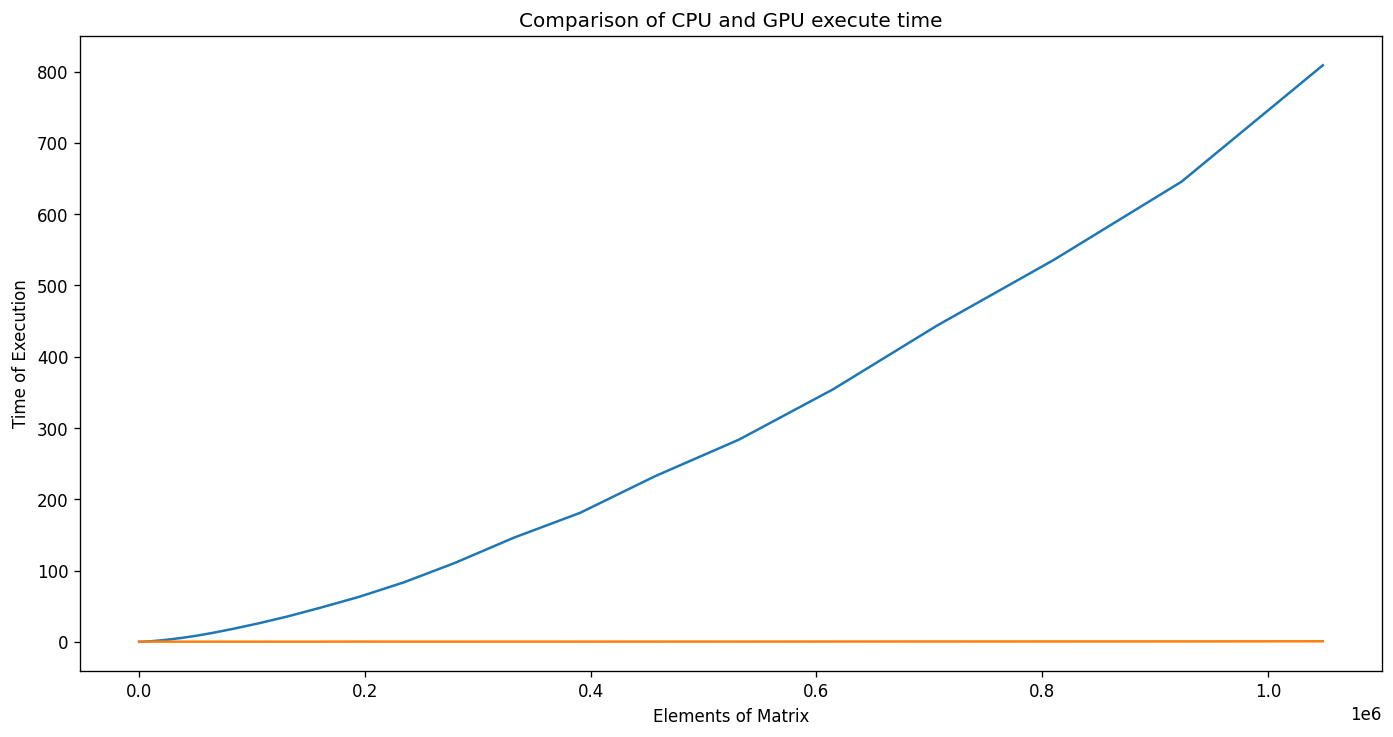

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=120)

plt.xlabel("Elements of Matrix")
plt.ylabel("Time of Execution")
plt.title("Comparison of CPU and GPU execute time")
ax1.plot(CPU_matsize, CPU_time)
ax1.plot(GPU_matsize,GPU_time)

In [ ]:
Acceleration = []
n=0
for element in GPU_time:
  tmp = CPU_time[n] / GPU_time[n]
  Acceleration.append(tmp)
  n+=1

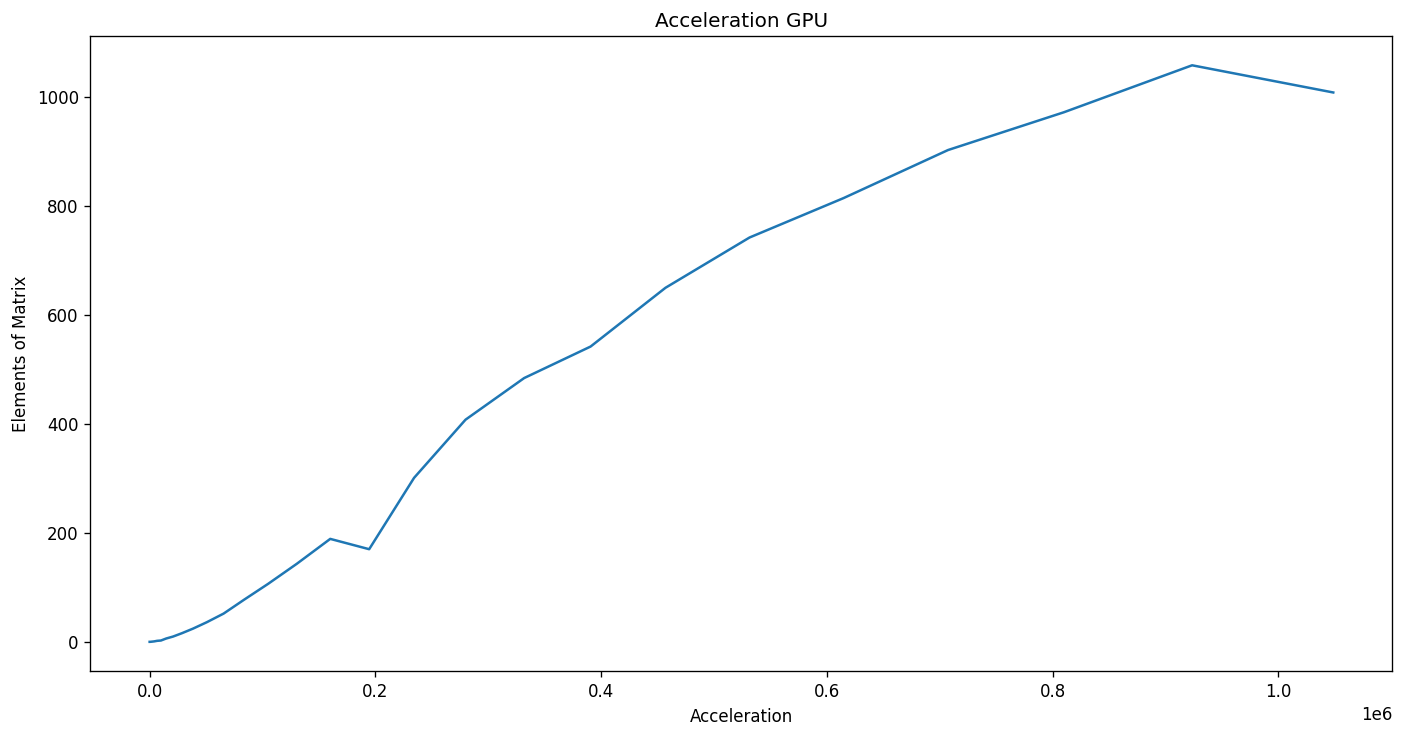

In [ ]:
fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=120)

plt.xlabel("Acceleration")
plt.ylabel("Elements of Matrix")
plt.title("Acceleration GPU")
ax2.plot(GPU_matsize, Acceleration)